<a href="https://colab.research.google.com/github/AndresT1234/AnaliticaDatos/blob/main/Clasificacion_Depresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Riesgo de Accidentalidad

1. Preparación de Datos
2. División de los datos 70-30
3. Aprendizaje del Modelo: Tree, Knn, NN, SVM, RandomForest
4. Evaluación del Modelo: matriz de confusion, P,R, ROC
5. Guardar el modelo

* El despliegue se realiza en otro jupyter_notebook

In [20]:
# Importamos librerías básicas
import pandas as pd  # manipulación dataframes
import numpy as np   # matrices y vectores
import matplotlib.pyplot as plt  # gráfica
import kagglehub  # descargar datasets

In [21]:
# Descargar el dataset desde Kaggle
path = kagglehub.dataset_download("hopesb/student-depression-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-depression-dataset


In [25]:
# Leer el archivo CSV (usando la ruta descargada)
data = pd.read_csv(f"{path}/Student Depression Dataset.csv")

In [26]:
# Mostrar las primeras filas del DataFrame
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [31]:
#Corrección de variables categóricas
data['Gender']=data['Gender'].astype('category')
data['City']=data['City'].astype('category')
data['Profession']=data['Profession'].astype('category')
data['Sleep Duration']=data['Sleep Duration'].astype('category')
data[' Dietary Habits']=data[' Dietary Habits'].astype('category')
data['Degree ']=data['Degree '].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  category
 3   City                                   27901 non-null  object  
 4   Profession                             27901 non-null  object  
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  obj

<Axes: >

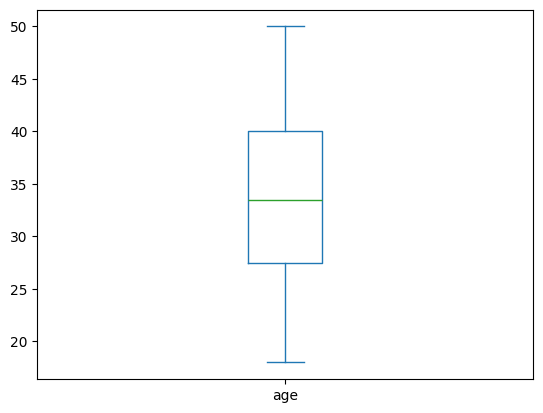

In [ ]:
#Descripción variables numérica
data.plot(kind='box')

<Axes: xlabel='cartype'>

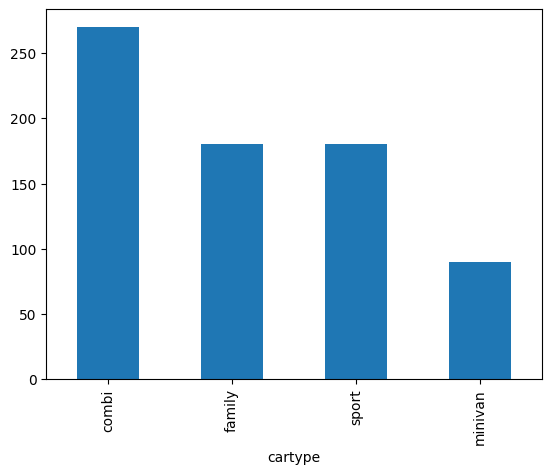

In [ ]:
#Descripción variables categóricas
data['cartype'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

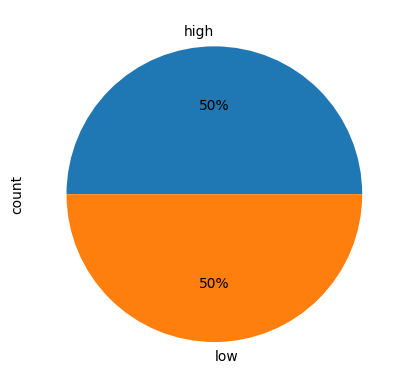

In [ ]:
data['risk'].value_counts().plot(kind='pie', autopct='%.0f%%')

In [ ]:
# Instalar pandas profiling
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=86721daa20d0d461627e5227ec403380377bb0f24ccd6c30223511e1028d15d4
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# Cargar librería para Profiling
from pandas_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False) # minimal=True
profile_data

<ipython-input-9-e259ff8b6818>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 144.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
data = pd.get_dummies(data, columns=['cartype'], drop_first=False, dtype=int)
data.head()

,age,risk,cartype_combi,cartype_family,cartype_minivan,cartype_sport
0,20,high,1,0,0,0
1,18,high,0,0,0,1
2,40,high,0,0,0,1
3,50,low,0,1,0,0
4,35,low,0,0,1,0


In [ ]:
#en clasificacion siempre aplico labelEncoder
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["risk"]=labelencoder.fit_transform(data["risk"]) #Objetivo

data.head()

,age,risk,cartype_combi,cartype_family,cartype_minivan,cartype_sport
0,20,0,1,0,0,0
1,18,0,0,0,0,1
2,40,0,0,0,0,1
3,50,1,0,1,0,0
4,35,1,0,0,1,0


#Fase N°2 division 70-30

<Axes: xlabel='risk'>

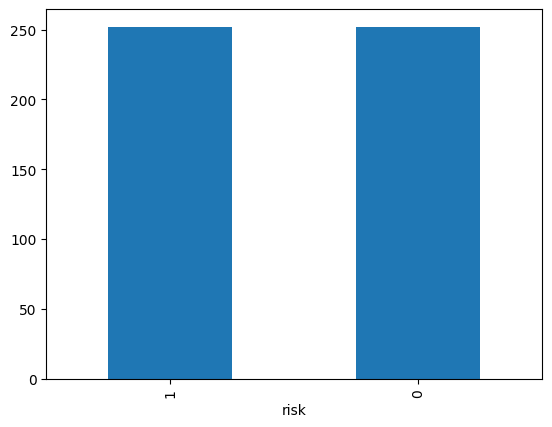

In [ ]:
#División 70-30
# siempre en  clasificacion tiene que tener muestreo estratificado

from sklearn.model_selection import train_test_split
X = data.drop("risk", axis = 1) # Variables predictoras
Y = data['risk'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')# Objetivo del 70%

<Axes: xlabel='risk'>

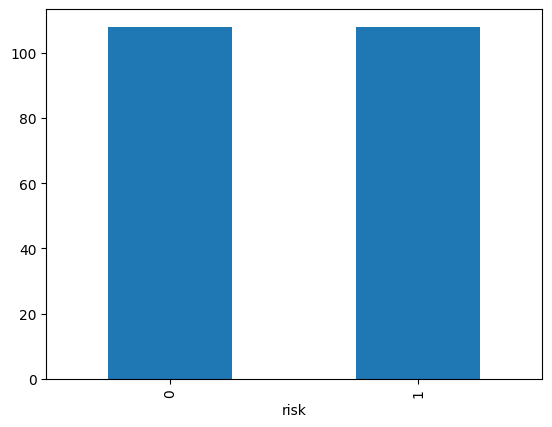

In [ ]:
Y_test.value_counts().plot(kind='bar')# Objetivo del 30%

#Arbol de decision

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None) #gini, entropy
modelTree.fit(X_train, Y_train) #70% train

DecisionTreeClassifier(min_samples_leaf=2)

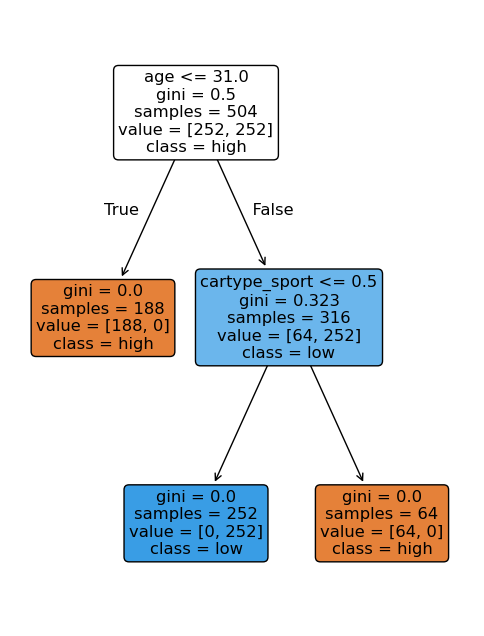

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

In [ ]:
#Evaluación 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
print(Y_pred)

[0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1
 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1]


In [ ]:
#Exactitud
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

1.0


In [ ]:
#Matriz de confusion
from sklearn import metrics

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm

array([[108,   0],
       [  0, 108]])

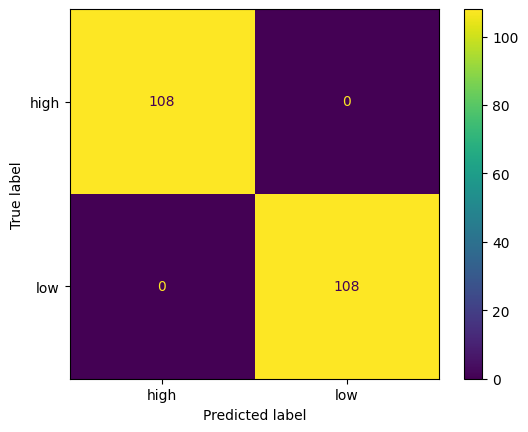

In [ ]:
#Plot de la matriz de confusion
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

In [ ]:
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       108
         low       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



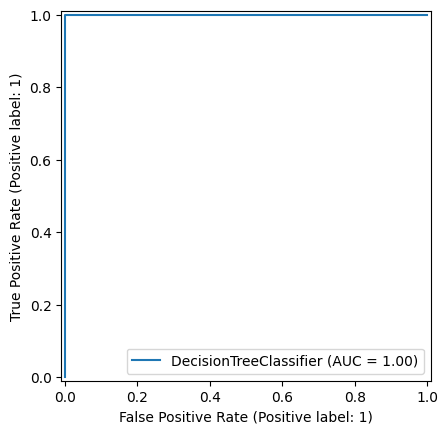

In [ ]:
metrics.RocCurveDisplay.from_estimator(modelTree,X_test, Y_test)

#Random Forest


In [ ]:
#Random forest no se normaliza
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)
model_rf.fit(X_train, Y_train) #70%

RandomForestClassifier(max_samples=0.7, min_samples_leaf=2)

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       108
         low       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



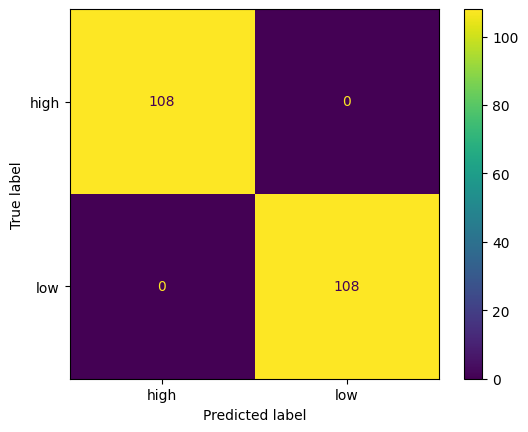

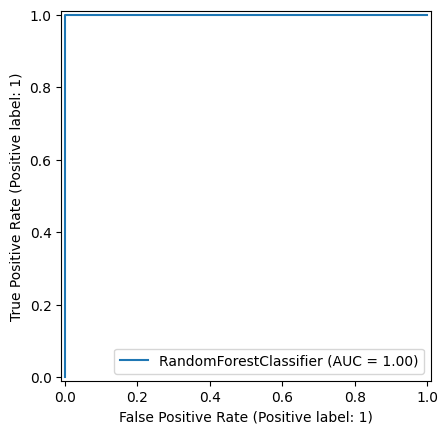

In [ ]:
#Evaluación de RandomForest con 30%
from sklearn import metrics

Y_pred = model_rf.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_rf,X_test, Y_test)

#KNN

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
#Se debe normalizar por que knn usa calculo por distancias
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['age']]) #Ajuste de los parametros: max - min

#Se aplica la normalización a 70%  y 30%
X_train[['age']]= min_max_scaler.transform(X_train[['age']]) #70%
X_test[['age']]= min_max_scaler.transform(X_test[['age']]) #30%
X_train.head()

,age,cartype_combi,cartype_family,cartype_minivan,cartype_sport
110,0.4375,0,1,0,0
73,0.0000,0,0,0,1
101,0.3750,1,0,0,0
9,0.0000,0,0,0,1
299,1.0000,0,1,0,0


In [ ]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier #KNeighborsRegressor

modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train, Y_train) #70%

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       108
         low       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



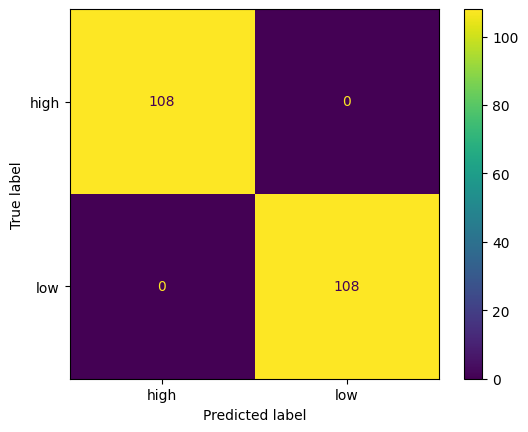

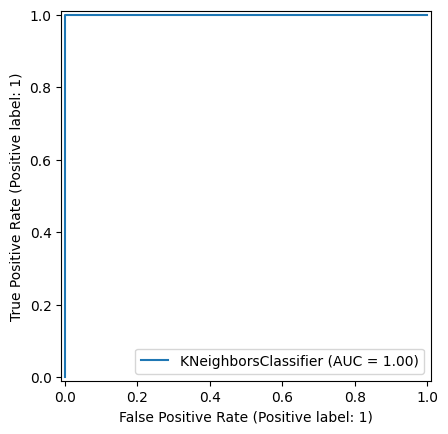

In [ ]:
#Evaluación de Knn con 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelKnn,X_test, Y_test)

#Red Neuronal
* normalizar los datos

In [ ]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=3)

modelNN.fit(X_train, Y_train) #70% normalizados

MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=500, momentum=0.3,
              random_state=3)

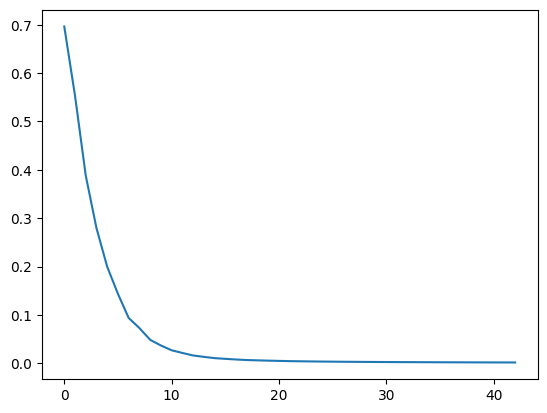

In [ ]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       108
         low       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



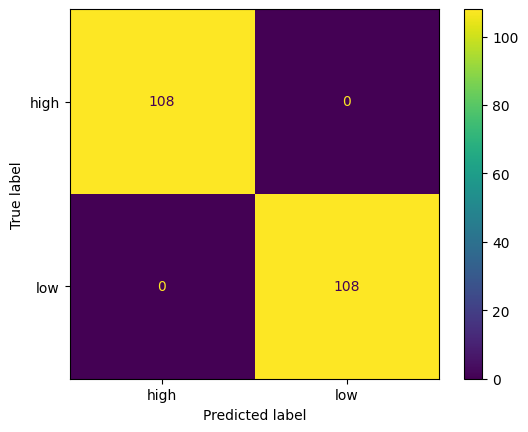

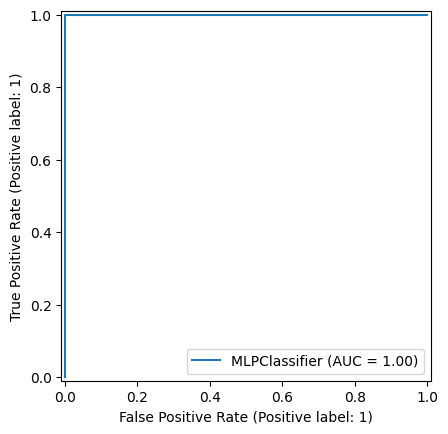

In [ ]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

#svm
* Normalizar

In [ ]:
#SVM
from sklearn.svm import SVC # SVR ->  SVC "clasificacion"------------------  SVR "regresion"

modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

SVC(kernel='linear')

In [ ]:
#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test) #30%

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       108
         low       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



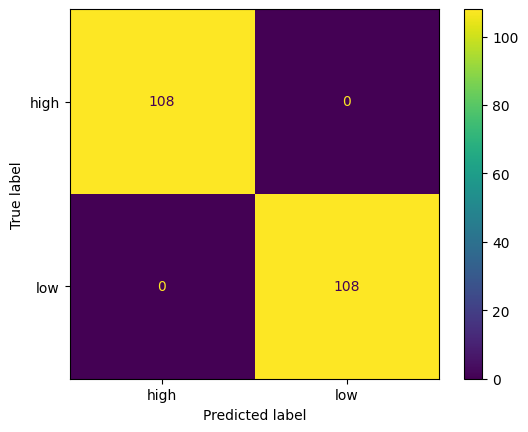

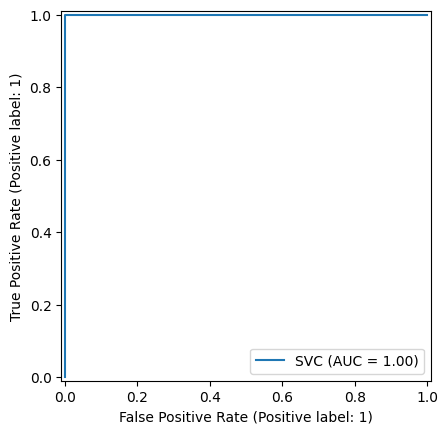

In [ ]:
#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelSVM,X_test, Y_test)

#Guardar el modelo

In [ ]:
import pickle
filename = 'modelo.pkl'
variables= X.columns._values
pickle.dump([modelTree,model_rf,modelKnn, modelNN, modelSVM, labelencoder,variables,min_max_scaler], open(filename, 'wb'))